# Employee Salary Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('employee salary.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000
1,28,Female,Master's,Data Analyst,3.0,65000
2,45,Male,PhD,Senior Manager,15.0,150000
3,36,Female,Bachelor's,Sales Associate,7.0,60000
4,52,Male,Master's,Director,20.0,200000
...,...,...,...,...,...,...
368,35,Female,Bachelor's,Senior Marketing Analyst,8.0,85000
369,43,Male,Master's,Director of Operations,19.0,170000
370,29,Female,Bachelor's,Junior Project Manager,2.0,40000
371,34,Male,Bachelor's,Senior Operations Coordinator,7.0,90000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    int64  
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 17.6+ KB


In [4]:
df.duplicated().sum()

49

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [7]:
df

,index,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,0,32,Male,Bachelor's,Software Engineer,5.0,90000
1,1,28,Female,Master's,Data Analyst,3.0,65000
2,2,45,Male,PhD,Senior Manager,15.0,150000
3,3,36,Female,Bachelor's,Sales Associate,7.0,60000
4,4,52,Male,Master's,Director,20.0,200000
...,...,...,...,...,...,...,...
319,346,28,Female,Bachelor's,Junior Operations Manager,1.0,35000
320,347,36,Male,Bachelor's,Senior Business Development Manager,8.0,110000
321,348,44,Female,PhD,Senior Data Scientist,16.0,160000
322,349,31,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000


In [8]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
df['Male'] = df['Gender'].apply(lambda x:1 if x=='Male' else 0)
df['Female'] = df['Gender'].apply(lambda x:1 if x=='Female' else 0)
# Destribute Gender in Male or Female
df[['Gender','Male','Female']].head(10)

,Gender,Male,Female
0,Male,1,0
1,Female,0,1
2,Male,1,0
3,Female,0,1
4,Male,1,0
5,Male,1,0
6,Female,0,1
7,Male,1,0
8,Female,0,1
9,Male,1,0


In [10]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD'], dtype=object)

In [11]:
df["Bachelor"] = df['Education Level'].apply(lambda x:1 if x=="Bachelor's" else 0)
df["Master"] = df['Education Level'].apply(lambda x:1 if x=="Master's" else 0)
df["PhD"] = df['Education Level'].apply(lambda x:1 if x=="PhD" else 0)
# Destribute Gender in Male or Female
df[['Education Level','Bachelor','Master','PhD']].head(10)

,Education Level,Bachelor,Master,PhD
0,Bachelor's,1,0,0
1,Master's,0,1,0
2,PhD,0,0,1
3,Bachelor's,1,0,0
4,Master's,0,1,0
5,Bachelor's,1,0,0
6,Master's,0,1,0
7,Bachelor's,1,0,0
8,Bachelor's,1,0,0
9,PhD,0,0,1


In [12]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [13]:
df.describe()

,index,Age,Years of Experience,Salary,Male,Female,Bachelor,Master,PhD
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,165.867284,37.382716,10.058642,99985.648148,0.524691,0.475309,0.589506,0.280864,0.129630
std,99.877065,7.185844,6.650470,48652.271440,0.500162,0.500162,0.492684,0.450116,0.336415
min,0.000000,23.000000,0.000000,350.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,80.750000,31.000000,4.000000,55000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,161.500000,36.500000,9.000000,95000.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,243.250000,44.000000,16.000000,140000.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,369.000000,53.000000,25.000000,250000.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
q1 = df['Salary'].quantile(0.25)
q3 = df['Salary'].quantile(0.75)
iqr =  q3- q1
print( q1, q3, iqr)
lower_sal =  q1 - ( iqr * 1.5)
upper_sal =  q3 + ( iqr * 1.5)
print(lower_sal,upper_sal)
lower_salary = df['Salary'].quantile(0.1)
Upper_salary = df['Salary'].quantile(0.9)
df.loc[df['Salary'] < lower_sal, 'Salary'] = lower_salary
df.loc[df['Salary'] > upper_sal, 'Salary'] = Upper_salary
# remove outliers

55000.0 140000.0 85000.0
-72500.0 267500.0


In [15]:
df.drop(columns=['index','Gender','Education Level'],inplace=True)

In [16]:
df['Age'] = df['Age'].astype('Int64')
df['Salary'] = df['Salary'].astype('Int64')

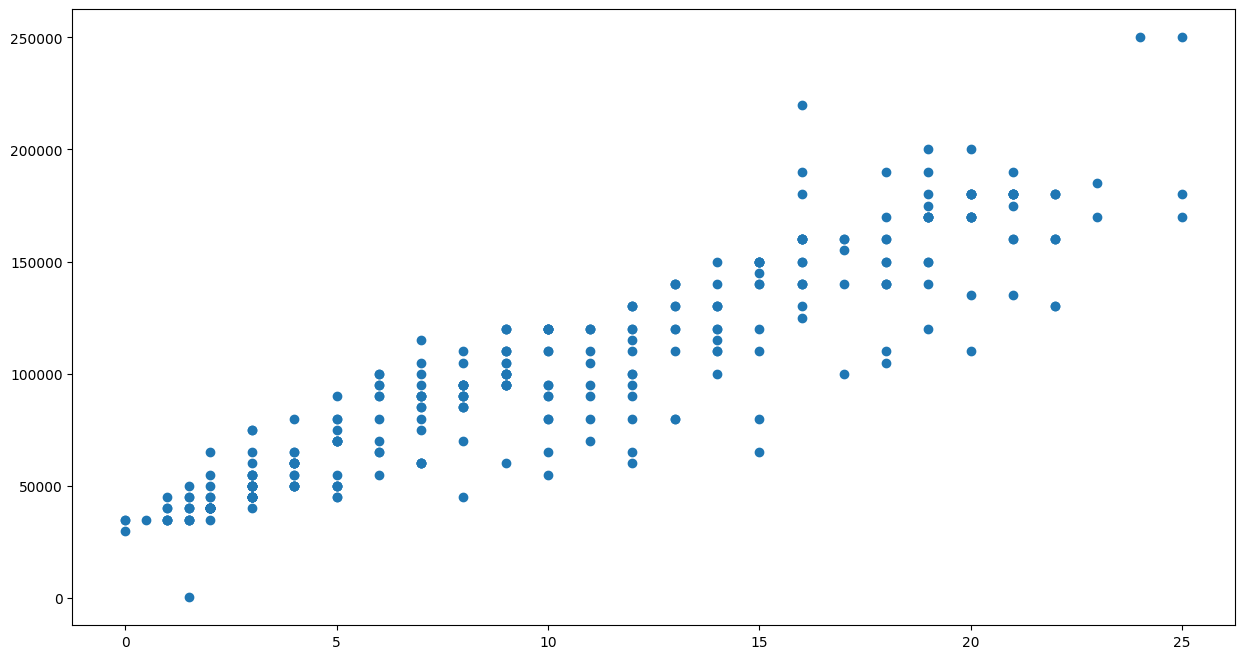

In [17]:
plt.figure(figsize=(15,8))
plt.scatter(df['Years of Experience'],df['Salary'])

In [18]:
df.head(252)

,Age,Job Title,Years of Experience,Salary,Male,Female,Bachelor,Master,PhD
0,32,Software Engineer,5.0,90000,1,0,1,0,0
1,28,Data Analyst,3.0,65000,0,1,0,1,0
2,45,Senior Manager,15.0,150000,1,0,0,0,1
3,36,Sales Associate,7.0,60000,0,1,1,0,0
4,52,Director,20.0,200000,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
247,47,Director of Operations,20.0,170000,1,0,0,1,0
248,29,Junior Business Operations Analyst,1.5,350,1,0,1,0,0
249,37,Senior Financial Manager,10.0,120000,0,1,1,0,0
250,31,Junior Marketing Coordinator,3.0,50000,0,1,1,0,0


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [20]:
X = df[['Age','Job Title','Years of Experience','Male','Female','Bachelor','Master','PhD']]
Y = df[['Salary']]

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [22]:
ohe = OneHotEncoder()
ohe.fit(X[['Job Title']])

OneHotEncoder()

In [23]:
column_transfer = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Job Title']),remainder='passthrough')

In [24]:
column_transfer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['Account Manager', 'Accountant', 'Administrative Assistant',
       'Business Analyst', 'Business Development Manager',
       'Business Intelligence Analyst', 'CEO', 'Chief Data Officer',
       'Chief Technology Officer', 'Content Marketing Manager',
       'Copywriter', 'Creative Director', 'Cu...
       'Social Media Manager', 'Social Media Specialist',
       'Software Developer', 'Software Engineer', 'Software Manager',
       'Software Project Manager', 'Strategy Consultant',
       'Supply Chain Analyst', 'Supply Chain Manager',
       'Technical Recruiter', 'Technical Support Specialist',
       'Technical Writer', 'Training Specialist', 'UX Designer',
       'UX Researcher', 'VP of Finance', 'VP of Operations',
       'Web Developer'], dtype=object)]),
                                 ['Job Title'])])

In [25]:
lr = LinearRegression()

In [26]:
pipe = make_pipeline(column_transfer,lr)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Account Manager', 'Accountant', 'Administrative Assistant',
       'Business Analyst', 'Business Development Manager',
       'Business Intelligence Analyst', 'CEO', 'Chief Data Officer',
       'Chief Technology Officer', 'Content Marketing Manager...
       'Software Developer', 'Software Engineer', 'Software Manager',
       'Software Project Manager', 'Strategy Consultant',
       'Supply Chain Analyst', 'Supply Chain Manager',
       'Technical Recruiter', 'Technical Support Specialist',
       'Technical Writer', 'Training Specialist', 'UX Designer',
       'UX Researcher', 'VP of Finance', 'VP of Operations',
       'Web Developer'], dtype=object)]),
                                                  ['Job Title'])])),
                ('linearregression', LinearRegression())])

In [27]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Account Manager', 'Accountant', 'Administrative Assistant',
       'Business Analyst', 'Business Development Manager',
       'Business Intelligence Analyst', 'CEO', 'Chief Data Officer',
       'Chief Technology Officer', 'Content Marketing Manager...
       'Software Developer', 'Software Engineer', 'Software Manager',
       'Software Project Manager', 'Strategy Consultant',
       'Supply Chain Analyst', 'Supply Chain Manager',
       'Technical Recruiter', 'Technical Support Specialist',
       'Technical Writer', 'Training Specialist', 'UX Designer',
       'UX Researcher', 'VP of Finance', 'VP of Operations',
       'Web Developer'], dtype=object)]),
                                                  ['Job Title'])])),
                ('linearregression', LinearRegression())])

In [28]:
y_pred = pipe.predict(x_test)

In [29]:
r2_score(y_test,y_pred)

0.8670321132004617